### Import class

In [1]:
from SSGPToolbox.preparators.Sentinel3.S3_L2_LST import S3_L2_LST

In [2]:
# Additional inputs
import os
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from pylab import rcParams
rcParams['figure.figsize'] = 11, 6

### Example of use

You need to prepare:
- file_path  --- the path to the archive you want to convert
- extent     --- dictionary format {'minX':..., 'minY':..., 'maxX':..., 'maxY':...}, where coordinates are specified in WGS84 
- resolution --- dictionary format {'xRes': 1000, 'yRes': 1000}, spatial resolution (specified in meters) by X, by Y
- key_values --- dictionary format {'gap': -100.0, 'skip': -200.0, 'noData': -32768.0}, indicating pixels with gaps

Example files are available at Samples/S3LST_preparation_example/source

In [3]:
# Path to input file
input_s3_lst = os.path.join(os.pardir, 'Samples', 'S3LST_preparation_example', 'source', 
                            'S3A_SL_2_LST____20190831T194258_20190831T194558_20190831T215631_0179_048_356_0900_LN2_O_NR_003.zip')

# Extent for final file
extent = {'minX': 30, 'minY': 58,'maxX': 31, 'maxY': 59}

# Spatial resolution for final file
resolution = {'xRes': 1000, 'yRes': 1000}

# Key values for cloud and no-data pixels. Which values should they have in final file?
key_values = {'gap': -100.0, 'skip': -200.0,'NoData': -32768.0}

The application of the algorithm

In [4]:
Preparator_S3LST = S3_L2_LST(file_path = input_s3_lst,
                       extent = extent,
                       resolution = resolution,
                       key_values = key_values)

Saving results to a files

In [5]:
# save_path --- folder to place the file with the result in
Preparator_S3LST.archive_to_geotiff(save_path = os.path.join(os.pardir, 'Samples', 
                                                             'S3LST_preparation_example', 'prepared'))

In [6]:
# save_path --- folder to place the file with the result in
Preparator_S3LST.archive_to_npy(save_path = os.path.join(os.pardir, 'Samples', 
                                                         'S3LST_preparation_example', 'prepared'))

We can look at the metadata:

In [7]:
Preparator_S3LST.metadata

{'file_name': 'S3A_SL_2_LST____20190831T194258_20190831T194558_20190831T215631_0179_048_356_0900_LN2_O_NR_003.zip',
 'satellite': 'S3A',
 'datetime': '20190831T194258',
 'extent': {'minX': 30, 'minY': 58, 'maxX': 31, 'maxY': 59},
 'utm_code': 32636,
 'utm_extent': {'minX': 322707.8800559506,
  'minY': 6432647.779613014,
  'maxX': 385106.3288748781,
  'maxY': 6541771.139590619},
 'resolution': {'xRes': 1000, 'yRes': 1000}}

Saving metadata to a file

In [8]:
metadata_path = os.path.join(os.pardir, 'Samples', 'S3LST_preparation_example',
                             'prepared', '20190831T194258_metadata.json')

# Saving metadata to a JSON file
Preparator_S3LST.save_metadata(output_path = metadata_path)

Let's look at the result we got

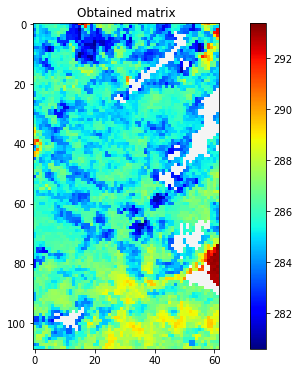

In [9]:
npy_path = os.path.join(os.pardir, 'Samples', 'S3LST_preparation_example','prepared', '20190831T194258.npy')
matrix = np.load(npy_path)

# Putting a mask on pixels with clouds (gap)
masked_array = np.ma.masked_where(matrix == Preparator_S3LST.key_values.get('gap'), matrix)
cmap = cm.get_cmap('jet')
cmap.set_bad(color='#F4F4F4')
plt.imshow(masked_array, interpolation = 'nearest', cmap = cmap)
plt.colorbar()
plt.title('Obtained matrix')
plt.show()

In [10]:
# Reconstruct geotiff from NPY. import function:
from SSGPToolbox.Preparators.common_functions import reconstruct_geotiff

In [11]:
# Run reconstruction. Just set path to NPY and saved metadata, and to output GeoTiff
reconstruct_geotiff(npy_path = os.path.join(os.pardir, 'Samples', 'S3LST_preparation_example', 
                                            'prepared','20190831T194258.npy'),
                    metadata_path = os.path.join(os.pardir, 'Samples', 'S3LST_preparation_example', 
                                                 'prepared','20190831T194258_metadata.json'),
                    output_path = os.path.join(os.pardir, 'Samples', 'S3LST_preparation_example', 
                                               'prepared', '20190831T194258_reconstructed.tif'))

If you want to get a matrix of landscape types for this territory

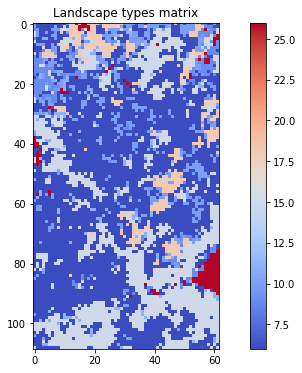

In [12]:
Preparator_S3LST = S3_L2_LST(file_path = input_s3_lst,
                       extent = extent,
                       resolution = resolution,
                       key_values = key_values)

# Saving the biome matrix in geotiff
Preparator_S3LST.archive_to_geotiff(save_path = os.path.join(os.pardir, 'Samples','S3LST_preparation_example', 'prepared'),
                                    biomes_instead_lst = True)
# Saving the biome matrix in npy
Preparator_S3LST.archive_to_npy(save_path = os.path.join(os.pardir, 'Samples','S3LST_preparation_example', 'prepared'),
                                biomes_instead_lst = True)

# Let's look at the results
npy_path = os.path.join(os.pardir, 'Samples', 'S3LST_preparation_example','prepared', '20190831T194258_biomes.npy')
matrix = np.load(npy_path)

cmap = cm.get_cmap('coolwarm')
cmap.set_bad(color='#F4F4F4')
plt.imshow(matrix, interpolation = 'nearest', cmap = cmap)
plt.colorbar()
plt.title('Landscape types matrix')
plt.show()

## Script for batch file processing

If you need to process files in batches instead of one at a time, you can use the suggested functions as follows:
- path --- the folder in which the archives with the data of the LST Sentinel-3
- save_path --- folder to place the file with the result in

In [13]:
def batch_to_npy(path, save_path):
    
    # Extent for final file
    extent = {'minX': 30, 'minY': 58,'maxX': 31, 'maxY': 59}

    # Spatial resolution for final file
    resolution = {'xRes': 1000, 'yRes': 1000}

    # Key values for cloud and no-data pixels. Which values should they have in final file?
    key_values = {'gap': -100.0, 'skip': -200.0,'NoData': -32768.0}

    # List of files in the directory
    files = os.listdir(path)
    files.sort()
    
    for file in files:
        if file.endswith(".zip"):
            file_path = os.path.join(path, file)
            
            Preparator_S3LST = S3_L2_LST(file_path = file_path,
                                         extent = extent,
                                         resolution = resolution,
                                         key_values = key_values)
            
            Preparator_S3LST.archive_to_npy(save_path = save_path)
            
            
batch_to_npy(os.path.join(os.pardir, 'Samples', 'S3LST_preparation_example','source'),
             os.path.join(os.pardir, 'Samples', 'S3LST_preparation_example','prepared'))

In [31]:
########################################
# Подготовка данных для препроцессинга #
########################################
#
#
#
#
#

from SSGPToolbox.Preparators.Sentinel3.S3_L2_LST import S3_L2_LST
# Additional inputs
import os
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from pylab import rcParams
rcParams['figure.figsize'] = 12, 12


# Path to input file
input_s3_lst = '/media/mikhail/Data1/Sentinel/S3B_SL_2_LST____20200626T192606_20200626T192906_20200626T214239_0179_040_256_0900_LN2_O_NR_004.zip'
extent = extent = {'minX': 29, 'minY': 57, 'maxX': 33, 'maxY': 61}
resolution = {'xRes': 1000, 'yRes': 1000}
key_values = {'gap': -100.0, 'skip': -200.0,'NoData': -32768.0}
Preparator_S3LST = S3_L2_LST(file_path = input_s3_lst,
                       extent = extent,
                       resolution = resolution,
                       key_values = key_values)
# Saving the biome matrix in npy
Preparator_S3LST.archive_to_npy(save_path = '/media/mikhail/Data1/Sentinel',
                                biomes_instead_lst = False)
Preparator_S3LST.archive_to_npy(save_path = '/media/mikhail/Data1/Sentinel',
                                biomes_instead_lst = True)

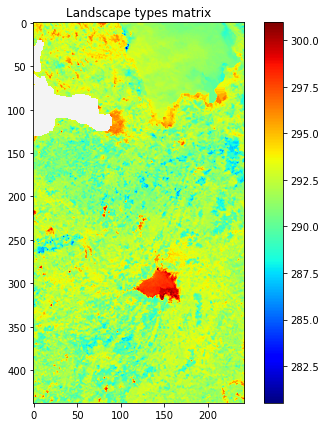

In [43]:
rcParams['figure.figsize'] = 7,7
# Let's look at the results
npy_path = os.path.join('/media/mikhail/Data1/Sentinel', '20200626T192606.npy')
matrix = np.load(npy_path)

masked_array = np.ma.masked_where(matrix <= -200.0, matrix)
cmap = cm.get_cmap('jet')
cmap.set_bad(color='#F4F4F4')
plt.imshow(masked_array, interpolation = 'spline16', cmap = cmap)
plt.colorbar()
plt.title('Landscape types matrix')
plt.show()

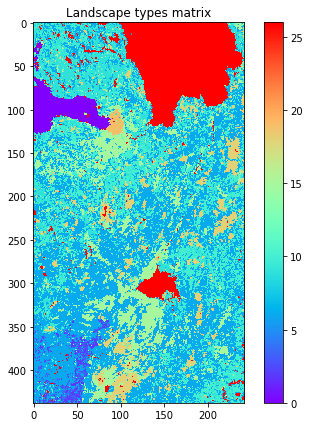

In [47]:
rcParams['figure.figsize'] = 7,7

npy_path = os.path.join('/media/mikhail/Data1/Sentinel', '20200626T192606_biomes.npy')
matrix = np.load(npy_path)

masked_array = np.ma.masked_where(matrix <= -100.0, matrix)
cmap = cm.get_cmap('rainbow')
cmap.set_bad(color='#F4F4F4')
plt.imshow(masked_array, interpolation = 'nearest', cmap = cmap)
plt.colorbar()
plt.title('Landscape types matrix')
plt.savefig('/media/mikhail/Data1/Графики/Gapfilling article/Raw_biomes.svg')